# Flow characterization

In [1]:
import os
import numpy as N
from magic import *
import matplotlib.pyplot as P
import matplotlib
from matplotlib.ticker import MultipleLocator
import string


P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])
matplotlib.rc("font", family="Times New Roman", size=14)
matplotlib.rc("axes", labelsize='large')
matplotlib.rc('xtick', labelsize='medium')
matplotlib.rc('ytick', labelsize='medium')

#Paths for simulations and for the folder to store figures
FIGS_DIR =  "/Users/bzaire/Report_Sims/paper_figs/"
TABS_DIR = "/Users/bzaire/Report_Sims/tables/"

fidpenergy = False # True represents fdip as the fractional energy

> Read data gathered from the literature

In [2]:
SodPlot = False
ThomasRes = False # Set True to overplot with thomas's result 

# Do you want to see guide lines?
guides = True

# Marker size
ms=10

##################################################################
####### Read data from soderlund 2012, 2014 (corrigendum) ########
##################################################################

racSod, reSod, cwzSod, rhzSod, kSod, sqrtfdipSod, elsDinSod, flfcSod, fifvSod = N.genfromtxt(TABS_DIR+'table_Soderlund_14.txt', unpack=True, delimiter='', usecols=(1,6,7,8,9,11,13,15,16))

if fidpenergy:
    fdipSod = sqrtfdipSod**2
else:
    fdipSod = sqrtfdipSod
    
symbolSod = []
for fdip in fdipSod:
    if fidpenergy:
        if fdip >= 0.25:
            symbolSod.append('o')
        else:
            symbolSod.append('X')
    else:
        if fdip >= 0.50:
            symbolSod.append('o')
        else:
            symbolSod.append('X')
            
rolSod = reSod*1.e-4*kSod/N.pi

#####################################
############ Thomas data ############
#####################################

#n1roGastine12  = N.array([3.68e-2, 6.98e-2, 8.02e-2, 1.59e-1, 2.03e-1, 2.47e-1])
#n15roGastine12 = N.array([3.56e-2, 6.08e-2, 1.02e-1, 1.25e-1, 1.52e-1, 1.97e-1])
#n3roGastine12  = N.array([4.35e-2, 5.91e-2, 8.83e-2, 1.0e-1, 1.15e-1, 1.38e-1, 2.41e-1])
    
#n1dipcmbGastine12  = N.array([0.73, 0.68, 0.62, 0.49, 4.9e-3, 1.37e-3])
#n15dipcmbGastine12 = N.array([0.66, 0.66, 0.49, 1.45e-2, 1.46e-2, 7.82e-3])
#n3dipcmbGastine12  = N.array([7.47e-6, 1.72e-5, 4.39e-5, 4.e-4, 1.08e-3, 0.06, 0.05])
    
#n1raGastine12 = N.array([1.e6, 1.5e6,2.e6,3.e6,4.e6,5.e6])/5.174e5
#n15raGastine12 = N.array([1.2e6, 1.5e6,2.e6,2.5e6,3.e6,4.e6])/8.151e5
#n3raGastine12 = N.array([2.5e6, 2.7e6,3.e6,3.2e6,3.5e6,4.e6,7.e6])/1.53e6

#files = ['Gastine_N0.txt', 'Gastine_N05.txt', 'Gastine_N1.txt', 'Gastine_N15.txt', 'Gastine_N2.txt', 'Gastine_N3.txt']


n1raGastine12, n1roGastine12, n1dipcmbGastine12 = N.genfromtxt(TABS_DIR+'Gastine_N1.txt', unpack=True, delimiter='', usecols=(0,13,24)) 
n15raGastine12, n15roGastine12, n15dipcmbGastine12 = N.genfromtxt(TABS_DIR+'Gastine_N15.txt', unpack=True, delimiter='', usecols=(0,13,24)) 
n3raGastine12, n3roGastine12, n3dipcmbGastine12 = N.genfromtxt(TABS_DIR+'Gastine_N3.txt', unpack=True, delimiter='', usecols=(0,13,24)) 

# select only dipolar initializations
ind1 = [0,2,4,6,8,9]
ind15 = [0,2,4,6,7,8]

n1raGastine12 = n1raGastine12[ind1]; n1roGastine12 = n1roGastine12[ind1]; n1dipcmbGastine12 = n1dipcmbGastine12[ind1]
n15raGastine12 = n15raGastine12[ind15]; n15roGastine12 = n15roGastine12[ind15]; n15dipcmbGastine12 = n15dipcmbGastine12[ind15]



n1raGastine12 = n1raGastine12/5.174e5
n15raGastine12 = n15raGastine12/8.151e5
n3raGastine12 = n3raGastine12/1.53e6

if not fidpenergy:
    n1dipcmbGastine12  = N.sqrt(n1dipcmbGastine12)
    n15dipcmbGastine12 = N.sqrt(n15dipcmbGastine12)
    n3dipcmbGastine12  = N.sqrt(n3dipcmbGastine12)    
    
symbol1Gastine = []
for fdip in n1dipcmbGastine12:
    if fdip >= 0.5:
        symbol1Gastine.append('o')
    else:
        symbol1Gastine.append('X')
        
symbol15Gastine = []
for fdip in n15dipcmbGastine12:
    if fdip >= 0.5:
        symbol15Gastine.append('o')
    else:
        symbol15Gastine.append('X')
        
symbol3Gastine = []
for fdip in n3dipcmbGastine12:
    if fdip >= 0.5:
        symbol3Gastine.append('o')
    else:
        symbol3Gastine.append('X')

> Our paper

In [3]:
empty, nrho, eta, ra, rac, tau, rolMean, rolMidConv, rm, els, elsmod, RelEqSymKin, RelEqSymKin_std, dipl11, fdip_std, cwz, rhz, rh  =   N.genfromtxt(TABS_DIR+'results_cwz.txt', unpack=True, delimiter='')

# Choose the Rossby definition to be used:
rolReS = rolMean       # mean value across the convective zone
#rolReS = rolMidConv    # value at the middle of the convective zone

runid = N.genfromtxt(TABS_DIR+'results_cwz.txt', usecols=(0), dtype=str)
ifc = N.array([runid[i][0:2] == 'FC' for i in range(len(runid))])
ipc = N.array([runid[i][0:2] == 'PC' for i in range(len(runid))])


symbol = []
for fdip in dipl11:
    if fdip >= 0.25:
        symbol.append('o')
    else:
        symbol.append('X')


if not fidpenergy:
    dipl11 = N.sqrt(dipl11)
        
symbol = N.array(symbol)

setup_color = []

for irho in nrho:
    if irho == 1.0:
        setup_color.append('r')
    elif irho == 1.5:
        setup_color.append('y')
    elif irho == 3.0:
        setup_color.append('b')
    
setup_color = N.array(setup_color)

## Columnarity vs Rayleigh

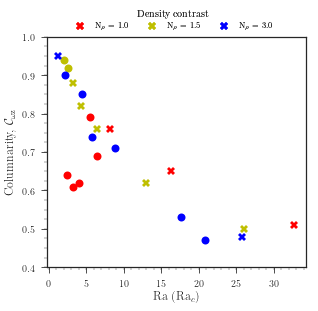

In [4]:
shellGap = 0.4

dx = 4; dy = 2


# Share a Y axis with each row of subplots
fig, ax = P.subplots(1, 1, figsize=(6,4))

for i in range(len(rac[nrho == 1.0])):
    l1, = ax.plot(N.array(rac[nrho == 1.0][i]), cwz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rac[nrho == 1.5])):
    l2, = ax.plot(N.array(rac[nrho == 1.5][i]), cwz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rac[nrho == 3.0])):
    l3, = ax.plot(N.array(rac[nrho == 3.0][i]), cwz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')
leg1 = ax.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[0.9, 1.15], title='Density contrast')
P.gca().add_artist(leg1)
ax.set_ylim((0.4,1.0))


if SodPlot:
    ax.plot(racSod, cwzSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = ax.plot(racSod[i], cwzSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)
        ax.legend((l4,), ('Soderlund et al. 2014',), loc='upper right')
        ax.set_ylim((0.3,1.))
        ax.set_xlim((0,35.))
        
ax.set_xlabel(r'Ra (Ra$_c$)')
ax.set_ylabel(r'$\mathcal{C}_{\omega\mathrm{z}}$')

ax.set_xlabel(r'Ra (Ra$_c$)')
ax.set_ylabel(r'Columnarity, $\mathcal{C}_{\omega\mathrm{z}}$')


ax.yaxis.set_minor_locator(MultipleLocator(.025))
ax.xaxis.set_minor_locator(MultipleLocator(1.))


pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Columnarity.pdf', dpi=100, bbox_inches='tight')
P.show()

## Relative Helicity vs Rayleigh

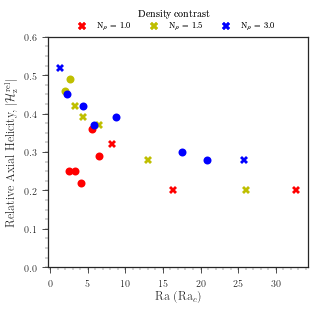

In [5]:
shellGap = 0.4

dx = 4; dy = 2


# Share a Y axis with each row of subplots
fig, ax = P.subplots(1, 1, figsize=(6,4))

for i in range(len(rac[nrho == 1.0])):
    l1, = ax.plot(N.array(rac[nrho == 1.0][i]), rhz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rac[nrho == 1.5])):
    l2, = ax.plot(N.array(rac[nrho == 1.5][i]), rhz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rac[nrho == 3.0])):
    l3, = ax.plot(N.array(rac[nrho == 3.0][i]), rhz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')
leg1 = ax.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[0.9, 1.15], title='Density contrast')
P.gca().add_artist(leg1)
ax.set_ylim((0.,.6))


if SodPlot:
    ax.plot(racSod, rhzSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = ax.plot(racSod[i], rhzSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)
        ax.legend((l4,), ('Soderlund et al. 2014',), loc='upper right')
        ax.set_xlim((0,35.))
        
ax.set_xlabel(r'Ra (Ra$_c$)')
ax.set_ylabel(r'$\mathcal{C}_{\omega\mathrm{z}}$')

ax.set_xlabel(r'Ra (Ra$_c$)')
ax.set_ylabel(r'Relative Axial Helicity, $|\mathcal{H}^\mathrm{rel}_\mathrm{z}|$')


ax.yaxis.set_minor_locator(MultipleLocator(.025))
ax.xaxis.set_minor_locator(MultipleLocator(1.))


pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('relHz.pdf', dpi=100, bbox_inches='tight')
P.show()

## Dipolarity vs Rossby

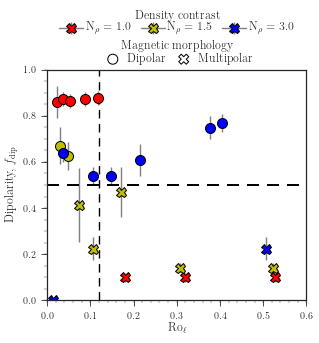

In [6]:
shellGap = 0.4

dx = 4; dy = 2




# Share a Y axis with each row of subplots
fig, ax = P.subplots(1, 1, figsize=(6,4))

if guides:
    ax.plot(N.linspace(0,.6,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    # ax.text(0.23,0.52, 'Dipolar$-$Multipolar transition', fontsize='medium')
    ax.plot((0.12)*N.ones(20), N.linspace(0,1.,20), 'k--', dashes=[6,4])


for i in range(len(rolReS[nrho == 1.0])):
    l1 = ax.errorbar(rolReS[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=fdip_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(rolReS[nrho == 1.5])):
    l2 = ax.errorbar(rolReS[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=fdip_std[nrho == 1.5][i],  
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(rolReS[nrho == 3.0])):
    l3 = ax.errorbar(rolReS[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=fdip_std[nrho == 3.0][i],
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])


    
l4 = ax.scatter(0., 1.1, marker='o', edgecolors='black', facecolors="none", s=100, lw=1.)
l5 = ax.scatter(0., 1.1, marker='X', edgecolors='black', facecolors="none", s=100, lw=1.)
first_legend = ax.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), 
                         ncol=3, bbox_to_anchor=[0.5, 1.2], title='Density contrast', labelspacing=0.08,
                         loc='center', columnspacing=.8, handletextpad=0.2,  fontsize='large')
d = first_legend.get_children()[0].get_children()[1].get_children()[0].get_children()[0].get_children()[0]
e = first_legend.get_children()[0].get_children()[1].get_children()[1].get_children()[0].get_children()[0]
f = first_legend.get_children()[0].get_children()[1].get_children()[2].get_children()[0].get_children()[0]
for a, b, c in zip(d.get_children(),e.get_children(), f.get_children()):
    a.set_color('gray')
    b.set_color('gray')
    c.set_color('gray')

ax2 = plt.gca().add_artist(first_legend)

leg2 = ax.legend((l4, l5), ('Dipolar', 'Multipolar'), ncol=2, 
                 bbox_to_anchor=[.5, 1.07], title='Magnetic morphology', labelspacing=0.08,
                 loc='center', columnspacing=.5, handletextpad=0.2, fontsize='large')

P.setp(first_legend.get_title(),fontsize='large')
P.setp(leg2.get_title(),fontsize='large')

ax.set_ylim((0.0,1.0))
ax.set_xlim((0.0,.6))


ax.set_xlabel(r'Ro$_\ell$')
ax.set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')


ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.xaxis.set_minor_locator(MultipleLocator(.02))


# Gastine et al. 2012
if ThomasRes:
    ax.plot(n1roGastine12, n1dipcmbGastine12, marker='o', color='gray', linestyle='', markersize=8, alpha=2./3)
    ax.plot(n15roGastine12, n15dipcmbGastine12, marker='o', color='gray', linestyle='', markersize=8, alpha=2./3)
    
    ax.plot(n3roGastine12, n3dipcmbGastine12, marker='o', color='gray', linestyle='', markersize=8, alpha=2./3)
#

if SodPlot:
    ax.plot(rolSod, fdipSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = ax.plot(rolSod[i], fdipSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)


        
pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Dipolarity.pdf', dpi=100, bbox_inches='tight')
P.show()

## Dipolarity vs flow proxies

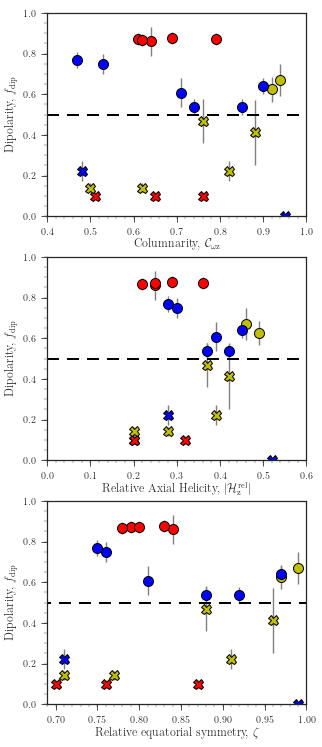

In [7]:
from mpl_toolkits.axes_grid1 import AxesGrid
nrows = 3
ncols = 1
fig, grid = P.subplots(nrows, ncols, figsize=(6,12), sharey=True)

shellGap = 0.4

if guides:
    grid[0].plot(N.linspace(0.4,1.,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    grid[1].plot(N.linspace(0,.6,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)
    grid[2].plot(N.linspace(0.4,1.,20), (.5)*N.ones(20), 'k--', dashes=[6,4], lw=2.)



for i in range(len(cwz[nrho == 1.0])):
    l1 = grid[0].errorbar(cwz[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=fdip_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(cwz[nrho == 1.5])):
    l2 = grid[0].errorbar(cwz[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=fdip_std[nrho == 1.5][i],  
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(cwz[nrho == 3.0])):
    l3 = grid[0].errorbar(cwz[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=fdip_std[nrho == 3.0][i], 
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])



if SodPlot:
    grid[0].plot(cwzSod, fdipSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[0].plot(cwzSod[i], fdipSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=ms, alpha=2./3)
grid[0].set_xlim((0.4,1.))

        

for i in range(len(rhz[nrho == 1.0])):
    l1 = grid[1].errorbar(rhz[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=fdip_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(rhz[nrho == 1.5])):
    l2 = grid[1].errorbar(rhz[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=fdip_std[nrho == 1.5][i],  
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(rhz[nrho == 3.0])):
    l3 = grid[1].errorbar(rhz[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=fdip_std[nrho == 3.0][i], 
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])



grid[1].set_xlim((0.,.6))
grid[1].set_ylim((0.,1.))

if SodPlot:
    grid[1].plot(rhzSod, fdipSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[1].plot(rhzSod[i], fdipSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=ms, alpha=2./3)
        grid[1].legend((l4,), ('Soderlund et al. 2014',), loc='upper left')
        
for i in range(len(RelEqSymKin[nrho == 1.0])):
    l1 = grid[2].errorbar(RelEqSymKin[nrho == 1.0][i], dipl11[nrho == 1.0][i], yerr=fdip_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.0][i])
for i in range(len(RelEqSymKin[nrho == 1.5])):
    l2 = grid[2].errorbar(RelEqSymKin[nrho == 1.5][i], dipl11[nrho == 1.5][i], yerr=fdip_std[nrho == 1.5][i],  
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 1.5][i])
for i in range(len(RelEqSymKin[nrho == 3.0])):
    l3 = grid[2].errorbar(RelEqSymKin[nrho == 3.0][i], dipl11[nrho == 3.0][i], yerr=fdip_std[nrho == 3.0][i],
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., mfc=setup_color[nrho == 3.0][i])

grid[2].set_xlim((0.69,1.))        
        
        
grid[0].xaxis.set_minor_locator(MultipleLocator(.02))
grid[0].xaxis.set_major_locator(MultipleLocator(.1))  
grid[0].set_xlabel(r'Columnarity, $\mathcal{C}_{\omega\mathrm{z}}$')

grid[1].xaxis.set_minor_locator(MultipleLocator(.02))
grid[1].xaxis.set_major_locator(MultipleLocator(.1))
grid[1].set_xlabel(r'Relative Axial Helicity, $|\mathcal{H}^\mathrm{rel}_\mathrm{z}|$')
        

grid[2].xaxis.set_minor_locator(MultipleLocator(.01))
grid[2].xaxis.set_major_locator(MultipleLocator(.05))
grid[2].set_xlabel(r'Relative equatorial symmetry, $\zeta$')
        

grid[0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')
grid[1].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')
grid[2].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')


grid[1].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1].yaxis.set_major_locator(MultipleLocator(.2))

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Columnarity.pdf', dpi=80, bbox_inches='tight')
P.show()

In [8]:
rhz[nrho == 1.5]

array([0.46, 0.49, 0.42, 0.39, 0.37, 0.28, 0.2 ])

## Flow proxies vs Rossby

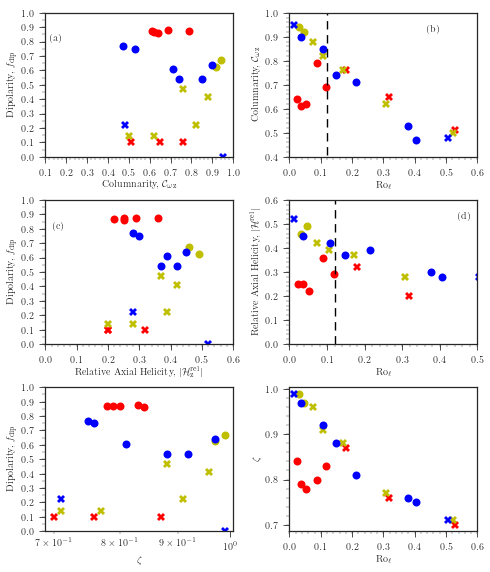

In [9]:
nrows = 3
ncols = 2
fig, grid = P.subplots(nrows, ncols, figsize=(10,9))

shellGap = 0.4

##################

for i in range(len(cwz[nrho == 1.0])):
    l1, = grid[0,0].plot(N.array(cwz[nrho == 1.0][i]), dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(cwz[nrho == 1.5])):
    l2, = grid[0,0].plot(N.array(cwz[nrho == 1.5][i]), dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(cwz[nrho == 3.0])):
    l3, = grid[0,0].plot(N.array(cwz[nrho == 3.0][i]), dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


if SodPlot:
    grid[0,0].plot(cwzSod, fdipSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[0,0].plot(cwzSod[i], fdipSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)
    leg1 = grid[0,0].legend((l1, l2, l3, l4), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0', r'N$_\rho$ = 0 (Soderlund et al. 2014)'), ncol=4, bbox_to_anchor=[2.1, 1.25], title='Density contrast')

if SodPlot:
    grid[0,1].plot(rolSod, cwzSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[0,1].plot(rolSod[i], cwzSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)


grid[0,0].set_xlim((0.1,1.))
grid[0,0].set_ylim((0.,1.))
grid[0,0].xaxis.set_minor_locator(MultipleLocator(.02))
grid[0,0].xaxis.set_major_locator(MultipleLocator(.1))  
grid[0,0].set_xlabel(r'Columnarity, $\mathcal{C}_{\omega\mathrm{z}}$', fontsize='medium')  
grid[0,0].yaxis.set_minor_locator(MultipleLocator(.05))
grid[0,0].yaxis.set_major_locator(MultipleLocator(.1))
grid[0,0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$', fontsize='medium')
        
################## 

for i in range(len(rhz[nrho == 1.0])):
    l1, = grid[0,1].plot(rolReS[nrho == 1.0][i], cwz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 1.5])):
    l2, = grid[0,1].plot(rolReS[nrho == 1.5][i], cwz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 3.0])):
    l3, = grid[0,1].plot(rolReS[nrho == 3.0][i], cwz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


grid[0,1].set_xlim((0.,.6)) 
grid[0,1].set_ylim((0.4,1.))   

grid[0,1].xaxis.set_minor_locator(MultipleLocator(.02))
grid[0,1].xaxis.set_major_locator(MultipleLocator(.1))
grid[0,1].set_xlabel(r'Ro$_\ell$', fontsize='medium')
grid[0,1].yaxis.set_minor_locator(MultipleLocator(.02))
grid[0,1].yaxis.set_major_locator(MultipleLocator(.1))
grid[0,1].set_ylabel(r'Columnarity, $\mathcal{C}_{\omega\mathrm{z}}$', fontsize='medium')      

##################        

for i in range(len(rhz[nrho == 1.0])):
    l1, = grid[1,0].plot(N.array(rhz[nrho == 1.0][i]), dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 1.5])):
    l2, = grid[1,0].plot(N.array(rhz[nrho == 1.5][i]), dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 3.0])):
    l3, = grid[1,0].plot(N.array(rhz[nrho == 3.0][i]), dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')

if SodPlot:
    grid[1,0].plot(rhzSod, fdipSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[1,0].plot(rhzSod[i], fdipSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)


grid[1,0].set_xlim((0.,.6))
grid[1,0].set_ylim((0.,1.))

grid[1,0].xaxis.set_minor_locator(MultipleLocator(.02))
grid[1,0].xaxis.set_major_locator(MultipleLocator(.1))
grid[1,0].set_xlabel(r'Relative Axial Helicity, $|\mathcal{H}^\mathrm{rel}_\mathrm{z}|$', fontsize='medium')        
grid[1,0].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1,0].yaxis.set_major_locator(MultipleLocator(.1))
grid[1,0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$', fontsize='medium')        

##################

for i in range(len(rhz[nrho == 1.0])):
    l1, = grid[2,0].plot(N.array(RelEqSymKin[nrho == 1.0][i]), dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 1.5])):
    l2, = grid[2,0].plot(N.array(RelEqSymKin[nrho == 1.5][i]), dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 3.0])):
    l3, = grid[2,0].plot(N.array(RelEqSymKin[nrho == 3.0][i]), dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


#grid[2,0].set_xlim((0.,.6))
grid[2,0].set_xscale('log')
grid[2,0].set_ylim((0.,1.))

#grid[2,0].xaxis.set_minor_locator(MultipleLocator(.02))
#grid[2,0].xaxis.set_major_locator(MultipleLocator(.1))
grid[2,0].set_xlabel(r'$\zeta$', fontsize='medium')        
grid[2,0].yaxis.set_minor_locator(MultipleLocator(.05))
grid[2,0].yaxis.set_major_locator(MultipleLocator(.1))
grid[2,0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$', fontsize='medium')        

##################


for i in range(len(rhz[nrho == 1.0])):
    l1, = grid[1,1].plot(rolReS[nrho == 1.0][i], rhz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 1.5])):
    l2, = grid[1,1].plot(rolReS[nrho == 1.5][i], rhz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 3.0])):
    l3, = grid[1,1].plot(rolReS[nrho == 3.0][i], rhz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


if SodPlot:
    grid[1,1].plot(rolSod, rhzSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[1,1].plot(rolSod[i], rhzSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)



grid[1,1].set_xlim((0.,.5)) 
grid[1,1].set_ylim((0.,.6))   

grid[1,1].xaxis.set_minor_locator(MultipleLocator(.02))
grid[1,1].xaxis.set_major_locator(MultipleLocator(.1))
grid[1,1].set_xlabel(r'Ro$_\ell$', fontsize='medium')
grid[1,1].yaxis.set_minor_locator(MultipleLocator(.02))
grid[1,1].yaxis.set_major_locator(MultipleLocator(.1))
grid[1,1].set_ylabel(r'Relative Axial Helicity, $|\mathcal{H}^\mathrm{rel}|$', fontsize='medium')        
        
##################   
for i in range(len(RelEqSymKin[nrho == 1.0])):
    l1, = grid[2,1].plot(rolReS[nrho == 1.0][i], RelEqSymKin[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 1.5])):
    l2, = grid[2,1].plot(rolReS[nrho == 1.5][i], RelEqSymKin[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(rhz[nrho == 3.0])):
    l3, = grid[2,1].plot(rolReS[nrho == 3.0][i], RelEqSymKin[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')

grid[2,1].set_xlim((0.,.6)) 

grid[2,1].xaxis.set_minor_locator(MultipleLocator(.02))
grid[2,1].xaxis.set_major_locator(MultipleLocator(.1))
grid[2,1].set_xlabel(r'Ro$_\ell$', fontsize='medium')
grid[2,1].yaxis.set_minor_locator(MultipleLocator(.02))
grid[2,1].yaxis.set_major_locator(MultipleLocator(.1))
grid[2,1].set_ylabel(r'$\zeta$', fontsize='medium')        



##################
# Label plots
grid[0,0].text(.12, 0.8, r'('+string.ascii_lowercase[0]+')', horizontalalignment='left')
grid[0,1].text(.48, 0.92, r'('+string.ascii_lowercase[1]+')', horizontalalignment='right')
grid[1,0].text(.02, 0.8, r'('+string.ascii_lowercase[2]+')', horizontalalignment='left')
grid[1,1].text(.48, 0.52, r'('+string.ascii_lowercase[3]+')', horizontalalignment='right')

# Dip-multipole transition
grid[0,1].plot((0.12)*N.ones(20), N.linspace(0,1.0,20), 'k--', dashes=[6,4])
grid[1,1].plot((0.12)*N.ones(20), N.linspace(0,1.0,20), 'k--', dashes=[6,4])

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-ypad, bottom=ypad, wspace=0.3, hspace=0.3)

os.chdir(FIGS_DIR)
P.savefig('ConvStyle.pdf', dpi=80, bbox_inches='tight')
P.show()

# Dipolarity vs Rayleigh

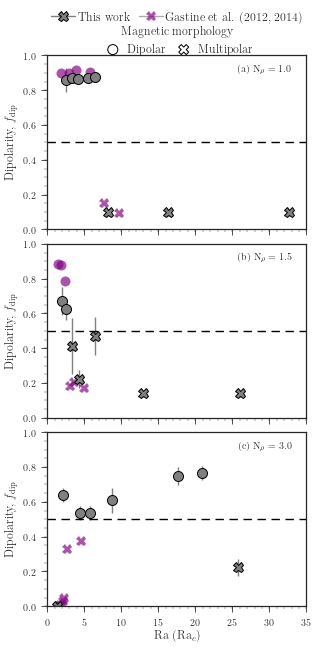

In [10]:
from mpl_toolkits.axes_grid1 import AxesGrid
nrows = 3
ncols = 1
dx = 4; dy = 2
fig = P.figure(figsize=(6,9))
grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.2,
                share_all = True,
                label_mode = 'L', # '1' or 'L'
                aspect = False
               )


shellGap = 0.4



########################################
for i in range(len(n1dipcmbGastine12)):
    l0, _, _ = grid[0].errorbar(n1raGastine12[i], n1dipcmbGastine12[i], marker=symbol1Gastine[i], ms=ms,  ecolor='gray', mfc='purple', alpha=2./3)
# this paper
grid[0].text(33., 0.9, r'('+string.ascii_lowercase[0]+r') N$_\rho = 1.0$', horizontalalignment='right')

for i in range(len(rac[nrho == 1.0])):
    l1, _, _ = grid[0].errorbar(rac[nrho == 1.0][i], dipl11[nrho == 1.0][i], xerr=0., yerr=fdip_std[nrho == 1.0][i], 
                       marker=symbol[nrho == 1.0][i], ms=ms, ecolor='gray', mec='k', mew=1., 
                       mfc='gray')
    
########################################
for i in range(len(n15dipcmbGastine12)):
    grid[1].errorbar(n15raGastine12[i], n15dipcmbGastine12[i], marker=symbol15Gastine[i], ms=ms, mfc='purple', alpha=2./3)
# this paper
grid[1].text(33., 0.9, r'('+string.ascii_lowercase[1]+r') N$_\rho = 1.5$', horizontalalignment='right')

for i in range(len(rac[nrho == 1.5])):
    l2, _, _ = grid[1].errorbar(rac[nrho == 1.5][i], dipl11[nrho == 1.5][i], xerr=0., yerr=fdip_std[nrho == 1.5][i], 
                       marker=symbol[nrho == 1.5][i], ms=ms, ecolor='gray', mec='k', mew=1., 
                       mfc='gray')
    
########################################
for i in range(len(n3dipcmbGastine12)):
    grid[2].errorbar(n3raGastine12[i], n3dipcmbGastine12[i], marker=symbol3Gastine[i], ms=ms, mfc='purple', alpha=2./3)
# this paper
grid[2].text(33., 0.9, r'('+string.ascii_lowercase[2]+r') N$_\rho = 3.0$', horizontalalignment='right')
for i in range(len(rac[nrho == 3.0])):
    l3, _, _ = grid[2].errorbar(rac[nrho == 3.0][i], dipl11[nrho == 3.0][i], xerr=0., yerr=fdip_std[nrho == 3.0][i], 
                       marker=symbol[nrho == 3.0][i], ms=ms, ecolor='gray', mec='k', mew=1., 
                       mfc='gray')

first_legend = grid[0].legend((l1, l0), ('This work', 'Gastine et al. (2012, 2014)'), 
                         ncol=2, bbox_to_anchor=[0.5, 1.22], loc='center', 
                         columnspacing=.8, handletextpad=0.2,  fontsize='large')  
c = first_legend.get_children()[0].get_children()[1].get_children()[0].get_children()[0].get_children()[0]
d = first_legend.get_children()[0].get_children()[1].get_children()[1].get_children()[0].get_children()[0]
for a, b in zip(c.get_children(),d.get_children()):
    a.set_color('gray')
    b.set_color('gray')

ax2 = grid[0].add_artist(first_legend)

    
l4 = ax.scatter(0., 1.1, marker='o', edgecolors='black', facecolors="none", s=100, lw=1.)
l5 = ax.scatter(0., 1.1, marker='X', edgecolors='black', facecolors="none", s=100, lw=1.)

leg2 = grid[0].legend((l4, l5), ('Dipolar', 'Multipolar'), ncol=2, 
                 bbox_to_anchor=[.5, 1.08], title='Magnetic morphology', 
                 loc='center', columnspacing=.5, handletextpad=0.2, fontsize='large')
P.setp(leg2.get_title(),fontsize='large')    

    
if guides:    
    grid[0].plot(N.linspace(0,35,20), (.5)*N.ones(20), 'k--', dashes=[6,4])
    grid[1].plot(N.linspace(0,35,20), (.5)*N.ones(20), 'k--', dashes=[6,4])
    grid[2].plot(N.linspace(0,35,20), (.5)*N.ones(20), 'k--', dashes=[6,4])
    
    
grid[0].set_xlim((0.0,35.))
grid[0].set_ylim((0.0,1.))

grid[2].set_xlabel(r'Ra (Ra$_c$)')
for i in range(nrows):
    grid[i].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')

grid[1].xaxis.set_minor_locator(MultipleLocator(1.))
grid[1].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1].xaxis.set_major_locator(MultipleLocator(5.))
grid[1].yaxis.set_major_locator(MultipleLocator(.2))



pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad) 

os.chdir(FIGS_DIR)
P.savefig('DipolarityRac.pdf', dpi=60, bbox_inches='tight')
P.show()

# Other tests

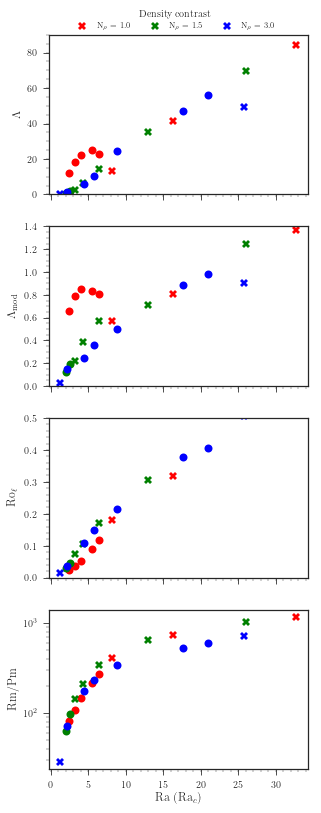

In [11]:
nrows = 4
ncols = 1
fig, grid = P.subplots(nrows, ncols, figsize=(6,12), sharex=True)


########################################

for i in range(len(rac[nrho == 1.0])):
    l1, = grid[0].plot(N.array(rac[nrho == 1.0][i]), els[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color='r', markersize=8, linestyle='')
    grid[1].plot(N.array(rac[nrho == 1.0][i]), elsmod[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color='r', markersize=8, linestyle='')
    grid[2].plot(N.array(rac[nrho == 1.0][i]), rolReS[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color='r', markersize=8, linestyle='')
    grid[3].plot(N.array(rac[nrho == 1.0][i]), rm[nrho == 1.0][i]/5, marker=symbol[nrho == 1.0][i], color='r', markersize=8, linestyle='')


for i in range(len(rac[nrho == 1.5])):
    l2, = grid[0].plot(N.array(rac[nrho == 1.5][i]), els[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color='g', markersize=8, linestyle='')
    grid[1].plot(N.array(rac[nrho == 1.5][i]), elsmod[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color='g', markersize=8, linestyle='')
    grid[2].plot(N.array(rac[nrho == 1.5][i]), rolReS[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color='g', markersize=8, linestyle='')
    grid[3].plot(N.array(rac[nrho == 1.5][i]), rm[nrho == 1.5][i]/5, marker=symbol[nrho == 1.5][i], color='g', markersize=8, linestyle='')



for i in range(len(rac[nrho == 3.0])):
    l3, = grid[0].plot(N.array(rac[nrho == 3.0][i]), els[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color='b', markersize=8, linestyle='')
    grid[1].plot(N.array(rac[nrho == 3.0][i]), elsmod[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color='b', markersize=8, linestyle='')
    grid[2].plot(N.array(rac[nrho == 3.0][i]), rolReS[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color='b', markersize=8, linestyle='')
    grid[3].plot(N.array(rac[nrho == 3.0][i]), rm[nrho == 3.0][i]/5, marker=symbol[nrho == 3.0][i], color='b', markersize=8, linestyle='')

    
leg1 = grid[0].legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[0.9, 1.2], title='Density contrast')


if SodPlot:
    grid[1].plot(racSod, elsDinSod, marker='', color='gray', linestyle='--', markersize=8, alpha=2./3)
    for i in range(len(symbolSod)):
        l4, = grid[1].plot(racSod[i], elsDinSod[i], marker=symbolSod[i], color='gray', linestyle='', markersize=8, alpha=2./3)
        grid[1].legend((l4,), ('Soderlund et al. 2014',), loc='upper right')
        grid[1].set_xlim((0.,35))
    

grid[3].set_xlabel(r'Ra (Ra$_c$)')
grid[0].set_ylabel(r'$\Lambda$')
grid[1].set_ylabel(r'$\Lambda_\mathrm{mod}$')
grid[2].set_ylabel(r'Ro$_\ell$')
grid[3].set_ylabel(r'Rm/Pm')

grid[0].set_ylim((0.,90))
grid[1].set_ylim((0.,1.4))
grid[2].set_ylim((0.,.5))

grid[3].set_yscale('log')


grid[2].xaxis.set_minor_locator(MultipleLocator(1.))
grid[2].xaxis.set_major_locator(MultipleLocator(5.))


grid[0].yaxis.set_minor_locator(MultipleLocator(5))
grid[0].yaxis.set_major_locator(MultipleLocator(20))

grid[1].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1].yaxis.set_major_locator(MultipleLocator(.2))

grid[2].yaxis.set_minor_locator(MultipleLocator(.02))
grid[2].yaxis.set_major_locator(MultipleLocator(.1))

pad = 0.05 # Padding around the edge of the figurea
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.5*ypad, bottom=ypad) 

P.show()

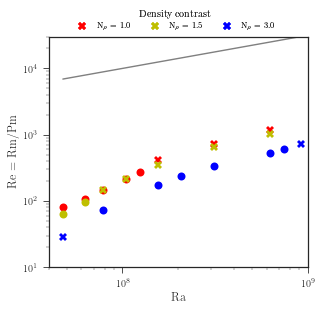

In [12]:
shellGap = 0.4

dx = 4; dy = 2


# Share a Y axis with each row of subplots
fig, ax = P.subplots(1, 1, figsize=(6,4))

for i in range(len(ra[nrho == 1.0])):
    l1, = ax.plot(ra[nrho == 1.0][i], rm[nrho == 1.0][i]/5, marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(ra[nrho == 1.5])):
    l2, = ax.plot(ra[nrho == 1.5][i], rm[nrho == 1.5][i]/5, marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(ra[nrho == 3.0])):
    l3, = ax.plot(ra[nrho == 3.0][i], rm[nrho == 3.0][i]/5, marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')
leg1 = ax.legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[0.9, 1.15], title='Density contrast')
P.gca().add_artist(leg1)

xra = N.linspace(ra.min(), ra.max(), 60)
ax.plot(xra, xra**0.5, 'gray')

ax.set_xlabel(r'Ra')
ax.set_ylabel(r'Re = Rm/Pm')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim((4.e7,1.e9))
ax.set_ylim((1.e1,3.e4))

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

P.show()

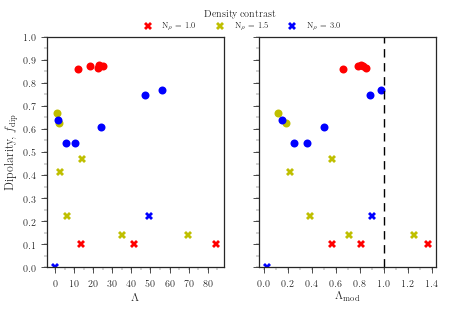

In [13]:
from mpl_toolkits.axes_grid1 import AxesGrid
nrows = 1
ncols = 2
fig, grid = P.subplots(nrows, ncols, figsize=(9,4), sharey=True)

Log = False


for i in range(len(els[nrho == 1.0])):
    l1, = grid[0].plot((els)[nrho == 1.0][i], dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(els[nrho == 1.5])):
    l2, = grid[0].plot((els)[nrho == 1.5][i], dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(els[nrho == 3.0])):
    l3, = grid[0].plot((els)[nrho == 3.0][i], dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')
grid[0].legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[1.7, 1.15], title='Density contrast')




for i in range(len(elsmod[nrho == 1.0])):
    l1, = grid[1].plot(N.array(elsmod[nrho == 1.0][i]), dipl11[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(elsmod[nrho == 1.5])):
    l2, = grid[1].plot(N.array(elsmod[nrho == 1.5][i]), dipl11[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(elsmod[nrho == 3.0])):
    l3, = grid[1].plot(N.array(elsmod[nrho == 3.0][i]), dipl11[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


grid[1].plot((1.)*N.ones(20), N.linspace(0,1.0,20), 'k--', dashes=[6,4])

grid[1].set_ylim((0.,1.))

grid[0].set_xlabel(r'$\Lambda$')
grid[1].set_xlabel(r'$\Lambda_\mathrm{mod}$')
grid[0].set_ylabel(r'Dipolarity, $f_\mathrm{dip}$')



grid[0].yaxis.set_minor_locator(MultipleLocator(.05))
grid[0].yaxis.set_major_locator(MultipleLocator(.1))

if Log:
    grid[0].set_xscale('log')
    grid[1].set_xscale('log')
else:
    grid[0].xaxis.set_minor_locator(MultipleLocator(5.))
    grid[0].xaxis.set_major_locator(MultipleLocator(10))
    grid[1].xaxis.set_minor_locator(MultipleLocator(.1))
    grid[1].xaxis.set_major_locator(MultipleLocator(.2))

grid[1].yaxis.set_minor_locator(MultipleLocator(.05))
grid[1].yaxis.set_major_locator(MultipleLocator(.1))

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Elsasser.pdf', dpi=100, bbox_inches='tight')
P.show()

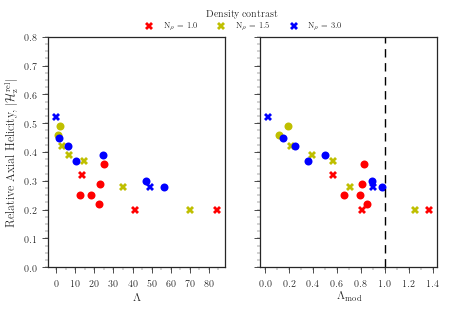

In [14]:
from mpl_toolkits.axes_grid1 import AxesGrid
nrows = 1
ncols = 2
fig, grid = P.subplots(nrows, ncols, figsize=(9,4), sharey=True)

Log = False


for i in range(len(els[nrho == 1.0])):
    l1, = grid[0].plot(N.array(els[nrho == 1.0][i]), rhz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(els[nrho == 1.5])):
    l2, = grid[0].plot(N.array(els[nrho == 1.5][i]), rhz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(els[nrho == 3.0])):
    l3, = grid[0].plot(N.array(els[nrho == 3.0][i]), rhz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')
grid[0].legend((l1, l2, l3), (r'N$_\rho$ = 1.0', r'N$_\rho$ = 1.5', r'N$_\rho$ = 3.0'), ncol=3, bbox_to_anchor=[1.7, 1.15], title='Density contrast')




for i in range(len(elsmod[nrho == 1.0])):
    l1, = grid[1].plot(N.array(elsmod[nrho == 1.0][i]), rhz[nrho == 1.0][i], marker=symbol[nrho == 1.0][i], color=setup_color[nrho == 1.0][i], markersize=8, linestyle='')
for i in range(len(elsmod[nrho == 1.5])):
    l2, = grid[1].plot(N.array(elsmod[nrho == 1.5][i]), rhz[nrho == 1.5][i], marker=symbol[nrho == 1.5][i], color=setup_color[nrho == 1.5][i], markersize=8, linestyle='')
for i in range(len(elsmod[nrho == 3.0])):
    l3, = grid[1].plot(N.array(elsmod[nrho == 3.0][i]), rhz[nrho == 3.0][i], marker=symbol[nrho == 3.0][i], color=setup_color[nrho == 3.0][i], markersize=8, linestyle='')


grid[1].plot((1.)*N.ones(20), N.linspace(0,1.0,20), 'k--', dashes=[6,4])

grid[1].set_ylim((0.,0.8))

grid[0].set_xlabel(r'$\Lambda$')
grid[1].set_xlabel(r'$\Lambda_\mathrm{mod}$')
grid[0].set_ylabel(r'Relative Axial Helicity, $|\mathcal{H}^\mathrm{rel}_\mathrm{z}|$')



grid[0].yaxis.set_minor_locator(MultipleLocator(.025))
grid[0].yaxis.set_major_locator(MultipleLocator(.1))

if Log:
    grid[0].set_xscale('log')
    grid[1].set_xscale('log')
else:
    grid[0].xaxis.set_minor_locator(MultipleLocator(5.))
    grid[0].xaxis.set_major_locator(MultipleLocator(10))
    grid[1].xaxis.set_minor_locator(MultipleLocator(.1))
    grid[1].xaxis.set_major_locator(MultipleLocator(.2))

grid[1].yaxis.set_minor_locator(MultipleLocator(.025))
grid[1].yaxis.set_major_locator(MultipleLocator(.1))

pad = 0.05 # Padding around the edge of the figure
xpad, ypad = dx * pad, dy * pad
fig.subplots_adjust(left=xpad, right=1-xpad, top=1-0.6*ypad, bottom=1.4*ypad)

os.chdir(FIGS_DIR)
P.savefig('Elsasser.pdf', dpi=100, bbox_inches='tight')
P.show()